In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pickle
#leemos el archivo con el nombre de fronteras
fronteras = pd.read_csv('fronteras.csv', sep =',')
#convertimos la fecha en algo legible le ponemos el string a tipo fecha
fronteras["Date"] = pd.to_datetime(fronteras["Date"], format="%m/%d/%y %H:%M")
#filtramos la fecha para 2019 ya con el tipo fecha
is_2019 = fronteras["Date"].dt.strftime("%Y") == "2019"
is_2018 = fronteras["Date"].dt.strftime("%Y") == "2018"
date = fronteras["Date"]
columnas=["Date", "State", "Port Name", "Measure", "Value"]
df=fronteras[columnas]
df

,Date,State,Port Name,Measure,Value
0,2020-02-01,AK,Alcan,Personal Vehicle Passengers,1414
1,2020-02-01,AK,Alcan,Personal Vehicles,763
2,2020-02-01,AK,Alcan,Truck Containers Empty,412
3,2020-02-01,AK,Alcan,Truck Containers Full,122
4,2020-02-01,AK,Alcan,Trucks,545
...,...,...,...,...,...
355506,1996-01-01,ND,Antler,Personal Vehicle Passengers,1576
355507,1996-01-01,CA,Tecate,Trucks,3228
355508,1996-01-01,ME,Calais,Trucks,8955
355509,1996-01-01,ND,Carbury,Truck Containers Empty,0


             Value
Date              
1996-01-01  530711
1996-02-01  557639
1996-03-01  650437
1996-04-01  698700
1996-05-01  790670
...            ...
2019-10-01  557638
2019-11-01  495835
2019-12-01  532484
2020-01-01  434962
2020-02-01  464738

[290 rows x 1 columns]


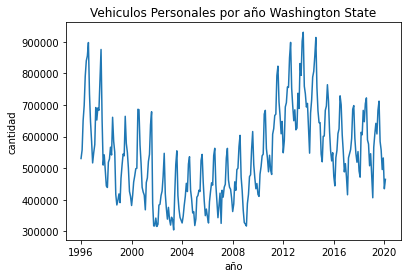

In [37]:
#pregunta 1
Estado = df["State"]=='WA'
Measure = df["Measure"]=='Personal Vehicles'
df_EDO = df[Estado & Measure]
df_EDOGraph =df_EDO.groupby("Date").sum()
print(df_EDOGraph)
plt.plot(df_EDOGraph)
plt.xlabel('año')  
plt.ylabel('cantidad')
plt.title("Vehiculos Personales por año Washington State")
plt.savefig('Washington P1')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

front = pd.read_csv('fronteras.csv', sep =',')
front["Date"] = pd.to_datetime(front["Date"], format="%m/%d/%y %H:%M")
is_usa = front["Border"]=='US-Canada Border'
is_mex = front["Border"]=='US-Mexico Border'
is_2019 = front["Date"].dt.strftime("%Y") == "2019"
is_2018 = front["Date"].dt.strftime("%Y") == "2018"
frame1 = front[is_2019 & is_mex]
frame2 = frame1[["Port Name","State","Date","Measure","Value"]]
is_per = frame1["Measure"] == "Personal Vehicles"
is_perve = frame1["Measure"] == "Personal Vehicles"
is_ped = frame1["Measure"] == "Pedestrians"
is_bus = frame1["Measure"] == "Bus Passengers"
st2 = frame1["State"] == "AZ"
st3 = frame1["State"] == "CA"
st10 = frame1["State"] == "NM"
st13 = frame1["State"] == "TX"


###################EJERCICIO 1######################

ejer1_est2 = front[is_mex & is_2019 & is_per & st2]
ejer1_est3 = front[is_mex & is_2019 & is_per & st3]
ejer1_est10 = front[is_mex & is_2019 & is_per & st10]
ejer1_est13 = front[is_mex & is_2019 & is_per & st13]


###################EJERCICIO 2######################
ejer2_est2 = front[is_mex & is_2019 & is_ped & st2]
ejer2_est3 = front[is_mex & is_2019 & is_ped & st3]
ejer2_est10 = front[is_mex & is_2019 & is_ped & st10]
ejer2_est13 = front[is_mex & is_2019 & is_ped & st13]

#####SOLO CAMBIAMOS ESTADO#####
x = ejer2_est13["Port Name"]
y = ejer2_est13["Value"]
#plt.title("Pedestrians por puerto de entrada Texas 2019")
#plt.scatter(x,y)
#plt.savefig('Texas p2 19')

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pickle
#leemos el archivo con el nombre de fronteras
fronteras = pd.read_csv('fronteras.csv', sep =',')
#convertimos la fecha en algo legible le ponemos el string a tipo fecha
fronteras["Date"] = pd.to_datetime(fronteras["Date"], format="%m/%d/%y %H:%M")
es_2019 = fronteras["Date"].dt.strftime("%Y") == "2019"
es_2018 = fronteras["Date"].dt.strftime("%Y") == "2018"
#-------------------------------------------------------------------

#Establecemos el data frame de que estamos en la frontera de Canada
es_Mex = fronteras["Border"] == "US-Mexico Border"
frontMex = fronteras[es_Mex & es_2018]
#------------------------------------------------------------------

#Creamos el data frame con ubicarnos en canada y sea el año 2019
DataFrameMex = pd.DataFrame(frontMex)
cols_to_subset = ["Port Name", "State", "Date", "Measure", "Value"]
filtroFinal = DataFrameMex[cols_to_subset]
DataFrameFiltro = pd.DataFrame(filtroFinal)
#print(filtroFinal)
#--------------------------------------------------------------------

#Creamos las coVTiciones de PVP y PV
es_PerVehPas = fronteras["Measure"] == "Personal Vehicle Passengers"
es_PerVeh = fronteras["Measure"] == "Personal Vehicles"
#--------------------------------------------------------------------

#Creamos las coVTiciones de PD
es_PD = fronteras["Measure"] == "Pedestrians"


#---------------------------------------------------------------------


#Creación de la ubicación de los estados
es_TX = fronteras["State"] == "TX"



#--------------------------------------------------------------------

#Creamos el DataFrame de VTPVP, VTPV Para el ESTADO DE TX
frameDePerVTPV = fronteras[es_2018 & es_Mex & es_PerVeh & es_TX]
DataFrameVTPV = pd.DataFrame(frameDePerVTPV)
#print(frameDePerVTPV)
frameDePerVTPVP = fronteras[es_2018 & es_Mex & es_PerVehPas & es_TX]
DataFrameVTPVP = pd.DataFrame(frameDePerVTPVP)
#print(frameDePerVTPVP)






#-------------------------------------------------------------------------

#Cremos el data frame de Pedestrians
frameDeVTPD = fronteras[es_2018 & es_Mex  & es_TX]
DataFrameVTPD = pd.DataFrame(frameDeVTPD)
#print(DataFrameVTPD)




#--------------------------------------------------------------------------


#Gráfica de lineas por estado sin detalles de puertas, que muestra el moviVTento de Personal Vehicles
#xVTPV=DataFrameVTPV['Date']
#yVTPV=DataFrameVTPV['Value']
#plt.plot(xVTPV,yVTPV)
#plt.show()





#-------------------------------------------------------------------------------------------------------

#Hacer Gráfica de puntos que muestre el comportaVTento de "Pedestrians". Que sea una gráfica
#por cada estado y con detalle de puertas en la horizontal
#xVTPD=frameDeVTPD['Port Name']
#yVTPD=frameDeVTPD['Value']
#plt.scatter(xVTPD,yVTPD)
#plt.show()



#--------------------------------------------------------------------------------------------------------


#Creamos  los data frames con la coVTición de PV y PVP Por estado
VTPV= DataFrameVTPV[DataFrameVTPV['Measure']=='Personal Vehicles']
VTPVP= DataFrameVTPVP[DataFrameVTPVP['Measure']=='Personal Vehicle Passengers']
dfVTPV= pd.DataFrame(VTPV)
dfVTPVP= pd.DataFrame(VTPVP)
sumaVTPV  = dfVTPV.groupby('Port Name')['Value'].sum()
sumaVTPVP = dfVTPVP.groupby('Port Name')['Value'].sum()
dfsumaVTPV= pd.DataFrame(sumaVTPV)
dfsumaVTPVP= pd.DataFrame(sumaVTPVP)






#print(dfsumaVTPV)
#print(dfsumaVTPVP)
#---------------------------------------------------------------------------------------


#Unimos PV y PVP POR CADA ESTADO dentro de un VTsmo data frame
JuntosVT= pd.merge(dfsumaVTPV,dfsumaVTPVP,on='Port Name')
dfJuntosVT=pd.DataFrame(JuntosVT)



#print(dfJuntosVT)
#-----------------------------------------------------------------------------------------


#Graficamos por estado las dos barras en una gráfica
#JuntosVTx = dfJuntosVT[['Value_x','Value_y']]
#JuntosVTx.plot.bar()
#plt.title("Personal Vehicles and passengers 2018 & 19 Texas")
#plt.savefig('Texas P3')


#-----------------------------------------------------------------------------------------


#Histograma de Buss pasengers para todos los estados

es_BP = fronteras["Measure"] == "Bus Passengers"
frameDeBP = fronteras[es_2018 & es_Mex & es_BP]
DataFrameBP = pd.DataFrame(frameDeBP)
#print(DataFrameBP)

#xBP=DataFrameBP['Value']
#yBP=DataFrameBP[]
#plt.hist(xBP)


DataFrameBP['Value'].plot.hist()
plt.title('Pasajeros Camiones 18 todos los edos')
plt.savefig('Todos edos p4 18')

